In [1]:
import copy
import numpy as np
from keras.datasets import imdb, reuters
from keras import models
from keras import layers
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt

2023-03-08 21:26:57.438186: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-08 21:26:57.908235: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-08 21:26:59.063110: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/bjbae/miniconda3/envs/ml/lib/
2023-03-08 21:26:59.065806: W tensorflow/compiler/xla/stream_

In [2]:
(train_data, train_labels), (test_data,
                             test_labels) = reuters.load_data(num_words=10000)

In [3]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [4]:
# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [5]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [6]:
# Our vectorized training labels
one_hot_train_labels = to_one_hot(train_labels)
# Our vectorized test labels
one_hot_test_labels = to_one_hot(test_labels)

# one_hot_train_labels = to_categorical(train_labels)
# one_hot_test_labels = to_categorical(test_labels)

In [7]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

2023-03-08 21:27:02.243143: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-08 21:27:02.313094: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-08 21:27:02.313591: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-03-08 21:27:02.314654: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other ope

In [8]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [9]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20


2023-03-08 21:27:15.022493: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-03-08 21:27:15.076169: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7fc6a6a5f870 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-03-08 21:27:15.076234: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3080, Compute Capability 8.6
2023-03-08 21:27:15.084239: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-03-08 21:27:15.288036: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-03-08 21:27:15.351346: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most on

16/16 [==============================] - 4s 23ms/step - loss: 2.7683 - accuracy: 0.5050 - val_loss: 1.8714 - val_accuracy: 0.5980
Epoch 2/20
16/16 [==============================] - 0s 12ms/step - loss: 1.5542 - accuracy: 0.6794 - val_loss: 1.3933 - val_accuracy: 0.7070
Epoch 3/20
16/16 [==============================] - 0s 11ms/step - loss: 1.1771 - accuracy: 0.7488 - val_loss: 1.2154 - val_accuracy: 0.7340
Epoch 4/20
16/16 [==============================] - 0s 11ms/step - loss: 0.9573 - accuracy: 0.7973 - val_loss: 1.0798 - val_accuracy: 0.7670
Epoch 5/20
16/16 [==============================] - 0s 11ms/step - loss: 0.7950 - accuracy: 0.8327 - val_loss: 0.9963 - val_accuracy: 0.7900
Epoch 6/20
16/16 [==============================] - 0s 12ms/step - loss: 0.6643 - accuracy: 0.8618 - val_loss: 0.9501 - val_accuracy: 0.7940
Epoch 7/20
16/16 [==============================] - 0s 12ms/step - loss: 0.5562 - accuracy: 0.8824 - val_loss: 0.9094 - val_accuracy: 0.8040
Epoch 8/20
16/16 [======

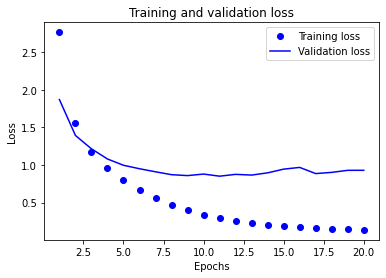

In [10]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig("images/reuters/original.png", dpi=1200, bbox_inches="tight")

plt.show()

## Further Experiments

In [11]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 32ms/step - loss: 3.2323 - accuracy: 0.4057 - val_loss: 2.5667 - val_accuracy: 0.5790
Epoch 2/20
16/16 [==============================] - 0s 11ms/step - loss: 2.1786 - accuracy: 0.6198 - val_loss: 1.8374 - val_accuracy: 0.6330
Epoch 3/20
16/16 [==============================] - 0s 11ms/step - loss: 1.6114 - accuracy: 0.6787 - val_loss: 1.4918 - val_accuracy: 0.6790
Epoch 4/20
16/16 [==============================] - 0s 11ms/step - loss: 1.3034 - accuracy: 0.7216 - val_loss: 1.2976 - val_accuracy: 0.7100
Epoch 5/20
16/16 [==============================] - 0s 11ms/step - loss: 1.1086 - accuracy: 0.7590 - val_loss: 1.1954 - val_accuracy: 0.7310
Epoch 6/20
16/16 [==============================] - 0s 11ms/step - loss: 0.9675 - accuracy: 0.7883 - val_loss: 1.1246 - val_accuracy: 0.7490
Epoch 7/20
16/16 [==============================] - 0s 11ms/step - loss: 0.8523 - accuracy: 0.8170 - val_loss: 1.0690 - val_accuracy: 0.7590
Epoch 8/20
16

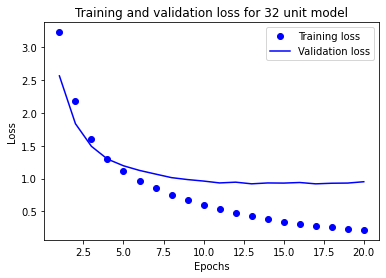

In [13]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss for 32 unit model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig("images/reuters/1.png", dpi=1200, bbox_inches="tight")

plt.show()

In [14]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 19ms/step - loss: 2.3411 - accuracy: 0.5411 - val_loss: 1.4945 - val_accuracy: 0.6670
Epoch 2/20
16/16 [==============================] - 0s 12ms/step - loss: 1.2753 - accuracy: 0.7207 - val_loss: 1.1921 - val_accuracy: 0.7300
Epoch 3/20
16/16 [==============================] - 0s 12ms/step - loss: 0.9595 - accuracy: 0.7883 - val_loss: 1.0244 - val_accuracy: 0.7850
Epoch 4/20
16/16 [==============================] - 0s 10ms/step - loss: 0.7430 - accuracy: 0.8374 - val_loss: 0.9649 - val_accuracy: 0.8140
Epoch 5/20
16/16 [==============================] - 0s 12ms/step - loss: 0.5811 - accuracy: 0.8757 - val_loss: 0.8635 - val_accuracy: 0.8170
Epoch 6/20
16/16 [==============================] - 0s 12ms/step - loss: 0.4699 - accuracy: 0.9019 - val_loss: 0.8535 - val_accuracy: 0.8120
Epoch 7/20
16/16 [==============================] - 0s 12ms/step - loss: 0.3712 - accuracy: 0.9207 - val_loss: 0.9596 - val_accuracy: 0.8060
Epoch 8/20
16

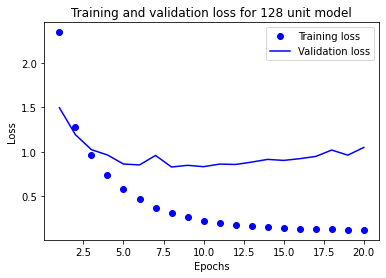

In [16]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss for 128 unit model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig("images/reuters/2.png", dpi=1200, bbox_inches="tight")

plt.show()

In [17]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 18ms/step - loss: 2.1524 - accuracy: 0.5215 - val_loss: 1.3866 - val_accuracy: 0.6600
Epoch 2/20
16/16 [==============================] - 0s 12ms/step - loss: 1.1560 - accuracy: 0.7369 - val_loss: 1.0721 - val_accuracy: 0.7610
Epoch 3/20
16/16 [==============================] - 0s 12ms/step - loss: 0.8397 - accuracy: 0.8092 - val_loss: 0.9958 - val_accuracy: 0.7910
Epoch 4/20
16/16 [==============================] - 0s 12ms/step - loss: 0.6139 - accuracy: 0.8672 - val_loss: 0.9230 - val_accuracy: 0.7900
Epoch 5/20
16/16 [==============================] - 0s 12ms/step - loss: 0.4869 - accuracy: 0.8901 - val_loss: 0.8361 - val_accuracy: 0.8240
Epoch 6/20
16/16 [==============================] - 0s 12ms/step - loss: 0.3400 - accuracy: 0.9261 - val_loss: 0.9195 - val_accuracy: 0.8070
Epoch 7/20
16/16 [==============================] - 0s 12ms/step - loss: 0.3042 - accuracy: 0.9305 - val_loss: 0.8592 - val_accuracy: 0.8200
Epoch 8/20
16

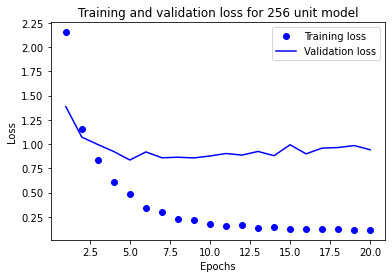

In [19]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss for 256 unit model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig("images/reuters/3.png", dpi=1200, bbox_inches="tight")

plt.show()

In [20]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 20ms/step - loss: 2.6975 - accuracy: 0.5205 - val_loss: 1.9674 - val_accuracy: 0.6400
Epoch 2/20
16/16 [==============================] - 0s 12ms/step - loss: 1.6231 - accuracy: 0.6956 - val_loss: 1.4487 - val_accuracy: 0.7160
Epoch 3/20
16/16 [==============================] - 0s 12ms/step - loss: 1.2011 - accuracy: 0.7638 - val_loss: 1.2097 - val_accuracy: 0.7600
Epoch 4/20
16/16 [==============================] - 0s 11ms/step - loss: 0.9603 - accuracy: 0.8029 - val_loss: 1.0770 - val_accuracy: 0.7890
Epoch 5/20
16/16 [==============================] - 0s 12ms/step - loss: 0.7951 - accuracy: 0.8400 - val_loss: 0.9846 - val_accuracy: 0.8020
Epoch 6/20
16/16 [==============================] - 0s 12ms/step - loss: 0.6713 - accuracy: 0.8663 - val_loss: 0.9317 - val_accuracy: 0.8020
Epoch 7/20
16/16 [==============================] - 0s 11ms/step - loss: 0.5738 - accuracy: 0.8845 - val_loss: 0.8840 - val_accuracy: 0.8220
Epoch 8/20
16

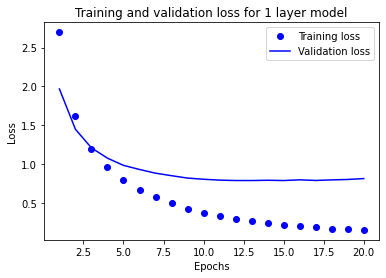

In [22]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss for 1 layer model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig("images/reuters/4.png", dpi=1200, bbox_inches="tight")

plt.show()

In [23]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 25ms/step - loss: 2.8830 - accuracy: 0.3983 - val_loss: 1.8971 - val_accuracy: 0.5920
Epoch 2/20
16/16 [==============================] - 0s 12ms/step - loss: 1.6010 - accuracy: 0.6565 - val_loss: 1.4149 - val_accuracy: 0.6880
Epoch 3/20
16/16 [==============================] - 0s 12ms/step - loss: 1.2396 - accuracy: 0.7264 - val_loss: 1.2351 - val_accuracy: 0.7240
Epoch 4/20
16/16 [==============================] - 0s 11ms/step - loss: 1.0447 - accuracy: 0.7600 - val_loss: 1.1424 - val_accuracy: 0.7310
Epoch 5/20
16/16 [==============================] - 0s 10ms/step - loss: 0.8783 - accuracy: 0.7997 - val_loss: 1.0829 - val_accuracy: 0.7510
Epoch 6/20
16/16 [==============================] - 0s 12ms/step - loss: 0.7415 - accuracy: 0.8311 - val_loss: 1.0324 - val_accuracy: 0.7640
Epoch 7/20
16/16 [==============================] - 0s 13ms/step - loss: 0.6228 - accuracy: 0.8543 - val_loss: 1.0115 - val_accuracy: 0.7830
Epoch 8/20
16

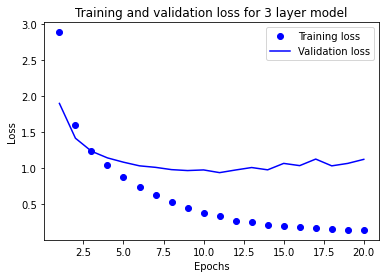

In [25]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss for 3 layer model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig("images/reuters/5.png", dpi=1200, bbox_inches="tight")

plt.show()